In [1]:
# program tries to predict stock price for a certain day, this specific program can only use dates that are about one month from the start of the month to it's end in acsending order, or just use index values to charts exceeding one month

In [2]:
# import the libraries
from sklearn.svm import SVR 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [47]:
# store data to var
df = pd.read_csv('Data/TSLA-June-2020.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000
1,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500
2,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500
3,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500
4,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500
5,2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000
6,2020-06-10,198.376007,205.496002,196.500000,205.009995,205.009995,92817000
7,2020-06-11,198.039993,203.792007,194.399994,194.567993,194.567993,79582500
8,2020-06-12,196.000000,197.595993,182.520004,187.056000,187.056000,83817000
9,2020-06-15,183.557999,199.768005,181.699997,198.179993,198.179993,78486000


In [48]:
# get the # of columns and rows
df.shape

(21, 7)

In [75]:
# get and print the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
20,2020-06-30,201.300003,217.537994,200.746002,215.962006,215.962006,84592500


In [6]:
# prepare the data for training the SVR models
# get all the data except the last row
df = df.head(len(df)-1)
# print the new data set
print(df)

Date        Open        High         Low       Close   Adj Close  \
0    2019-09-16   49.200001   49.486000   48.234001   48.562000   48.562000   
1    2019-09-17   48.493999   49.119999   48.074001   48.958000   48.958000   
2    2019-09-18   49.000000   49.633999   48.473999   48.698002   48.698002   
3    2019-09-19   49.200001   49.588001   48.967999   49.320000   49.320000   
4    2019-09-20   49.298000   49.389999   47.632000   48.124001   48.124001   
..          ...         ...         ...         ...         ...         ...   
245  2020-09-03  407.230011  431.799988  402.000000  407.000000  407.000000   
246  2020-09-04  402.809998  428.000000  372.019989  418.320007  418.320007   
247  2020-09-08  356.000000  368.739990  329.880005  330.209991  330.209991   
248  2020-09-09  356.600006  369.000000  341.510010  366.279999  366.279999   
249  2020-09-10  386.209991  398.989990  360.559998  371.339996  371.339996   

        Volume  
0     23640500  
1     19327000  
2     20851

In [50]:
# create empty list to store the independent and depenedent data
days = list()
adj_close_prices = list()

In [51]:
# Get the date and adjusted close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [52]:
# create the independent data set
for day in df_days:
    days.append( [int(day.split('-')[2])] )

# create the dependent data set
for adj_close_price in df_adj_close:
    adj_close_prices.append( float(adj_close_price) )

In [53]:
# print the days and adj close prices
print(days)
print(adj_close_prices)

[[2], [3], [4], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [25], [26], [29], [30]]
[176.311996, 176.591995, 172.87600700000002, 177.132004, 189.983994, 188.134003, 205.009995, 194.567993, 187.056, 198.179993, 196.425995, 198.358002, 200.792007, 200.179993, 198.863998, 200.35600300000002, 192.169998, 197.195999, 191.94799799999998, 201.869995, 215.962006]


In [54]:
# create the 3 Support Vector Regression (SVR) models

# Create and train a SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

# Create and train a SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

# Create and train a SVR model using a rbf kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma = 0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

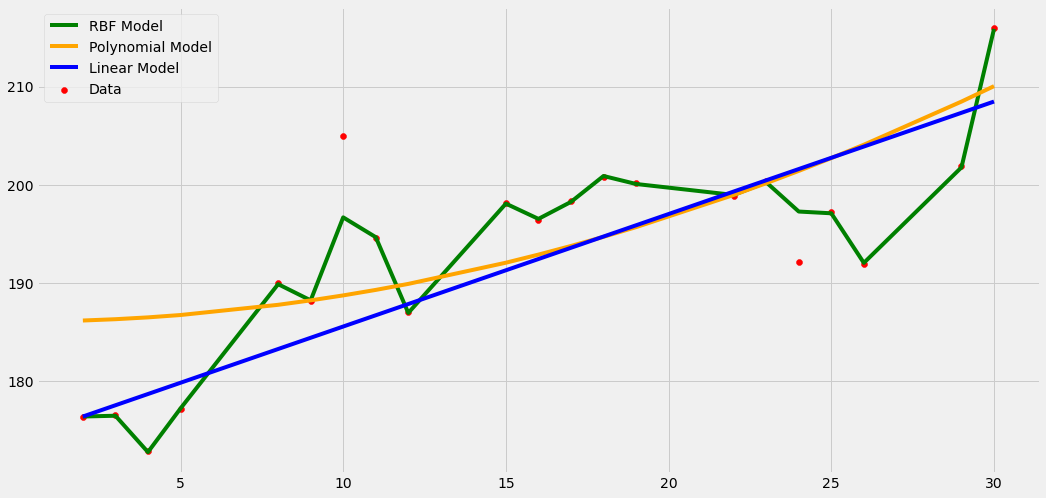

In [55]:
# plot the models on a graph to see which has the best fit to the original data

plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color='red', label='Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='blue', label='Linear Model')
plt.legend()
plt.show()

In [76]:
# show the predicted price for the given day
day = [[30]]

print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))
print('The actual price on that day is: ', actual_price['Adj Close'].values)

The RBF SVR predicted:  [215.86170745]
The Linear SVR predicted:  [208.470672]
The Polynomial SVR predicted:  [210.03792073]
The actual price on that day is:  [215.962006]
